In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Administrator\Desktop\dataset4-main\medical_cost_insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64


male      676
female    662
Name: sex, dtype: int64


32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64


0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


no     1064
yes     274
Name: smoker, dtype: int64


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64


1639.56310     2
16884.92400    1
29330.98315    1
2221.56445     1
19798.05455 

In [8]:
df.nunique().to_frame('No.Of Unique Values')

,No.Of Unique Values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [9]:
from sklearn.preprocessing import OrdinalEncoder

In [10]:
ord_enc = OrdinalEncoder(categories=[['female','male']])
df1 = ord_enc.fit_transform(df[['sex']])
df1

array([[0.],
       [1.],
       [1.],
       ...,
       [0.],
       [0.],
       [0.]])

In [11]:
df['sex'] = df1
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,yes,southwest,16884.92400
1,18,1.0,33.770,1,no,southeast,1725.55230
2,28,1.0,33.000,3,no,southeast,4449.46200
3,33,1.0,22.705,0,no,northwest,21984.47061
4,32,1.0,28.880,0,no,northwest,3866.85520


In [12]:
ord_enc = OrdinalEncoder(categories=[['no','yes']])
df2= ord_enc.fit_transform(df[['smoker']])
df2

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [1.]])

In [13]:
df['smoker'] = df2
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,southwest,16884.92400
1,18,1.0,33.770,1,0.0,southeast,1725.55230
2,28,1.0,33.000,3,0.0,southeast,4449.46200
3,33,1.0,22.705,0,0.0,northwest,21984.47061
4,32,1.0,28.880,0,0.0,northwest,3866.85520


In [14]:
from sklearn.preprocessing import LabelEncoder

lab_enc = LabelEncoder()

In [15]:
df3 = lab_enc.fit_transform(df['region'])
pd.Series(df3)

0       3
1       2
2       2
3       1
4       1
       ..
1333    1
1334    0
1335    2
1336    3
1337    1
Length: 1338, dtype: int32

In [16]:
df['region'] = df3
df

,age,sex,bmi,children,smoker,region,charges
0,19,0.0,27.900,0,1.0,3,16884.92400
1,18,1.0,33.770,1,0.0,2,1725.55230
2,28,1.0,33.000,3,0.0,2,4449.46200
3,33,1.0,22.705,0,0.0,1,21984.47061
4,32,1.0,28.880,0,0.0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1.0,30.970,3,0.0,1,10600.54830
1334,18,0.0,31.920,0,0.0,0,2205.98080
1335,18,0.0,36.850,0,0.0,2,1629.83350
1336,21,0.0,25.800,0,0.0,3,2007.94500


In [17]:
df.dtypes

age           int64
sex         float64
bmi         float64
children      int64
smoker      float64
region        int32
charges     float64
dtype: object

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(4), int32(1), int64(2)
memory usage: 68.1 KB


In [19]:
print('Total Duplicates Rows are ',df.duplicated().sum())

Total Duplicates Rows are  1


In [20]:
df.drop_duplicates(inplace=True)


In [21]:
df.shape

(1337, 7)

In [22]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,0.504862,30.663452,1.095737,0.204936,1.516081,13279.121487
std,14.044333,0.500163,6.100468,1.205571,0.403806,1.105208,12110.359656
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.290000,0.000000,0.000000,1.000000,4746.344000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9386.161300
75%,51.000000,1.000000,34.700000,2.000000,0.000000,2.000000,16657.717450
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


1) The count of all columns are same.

2) The mean = median(50%) in 'age','bmi' column means data is normally distributed.

3) The mean is greater than median in 'charges' column which means data is skewed to right.

4) There is difference between 75% and max in 'age','bmi','charges',which means there are outliers present in the data.


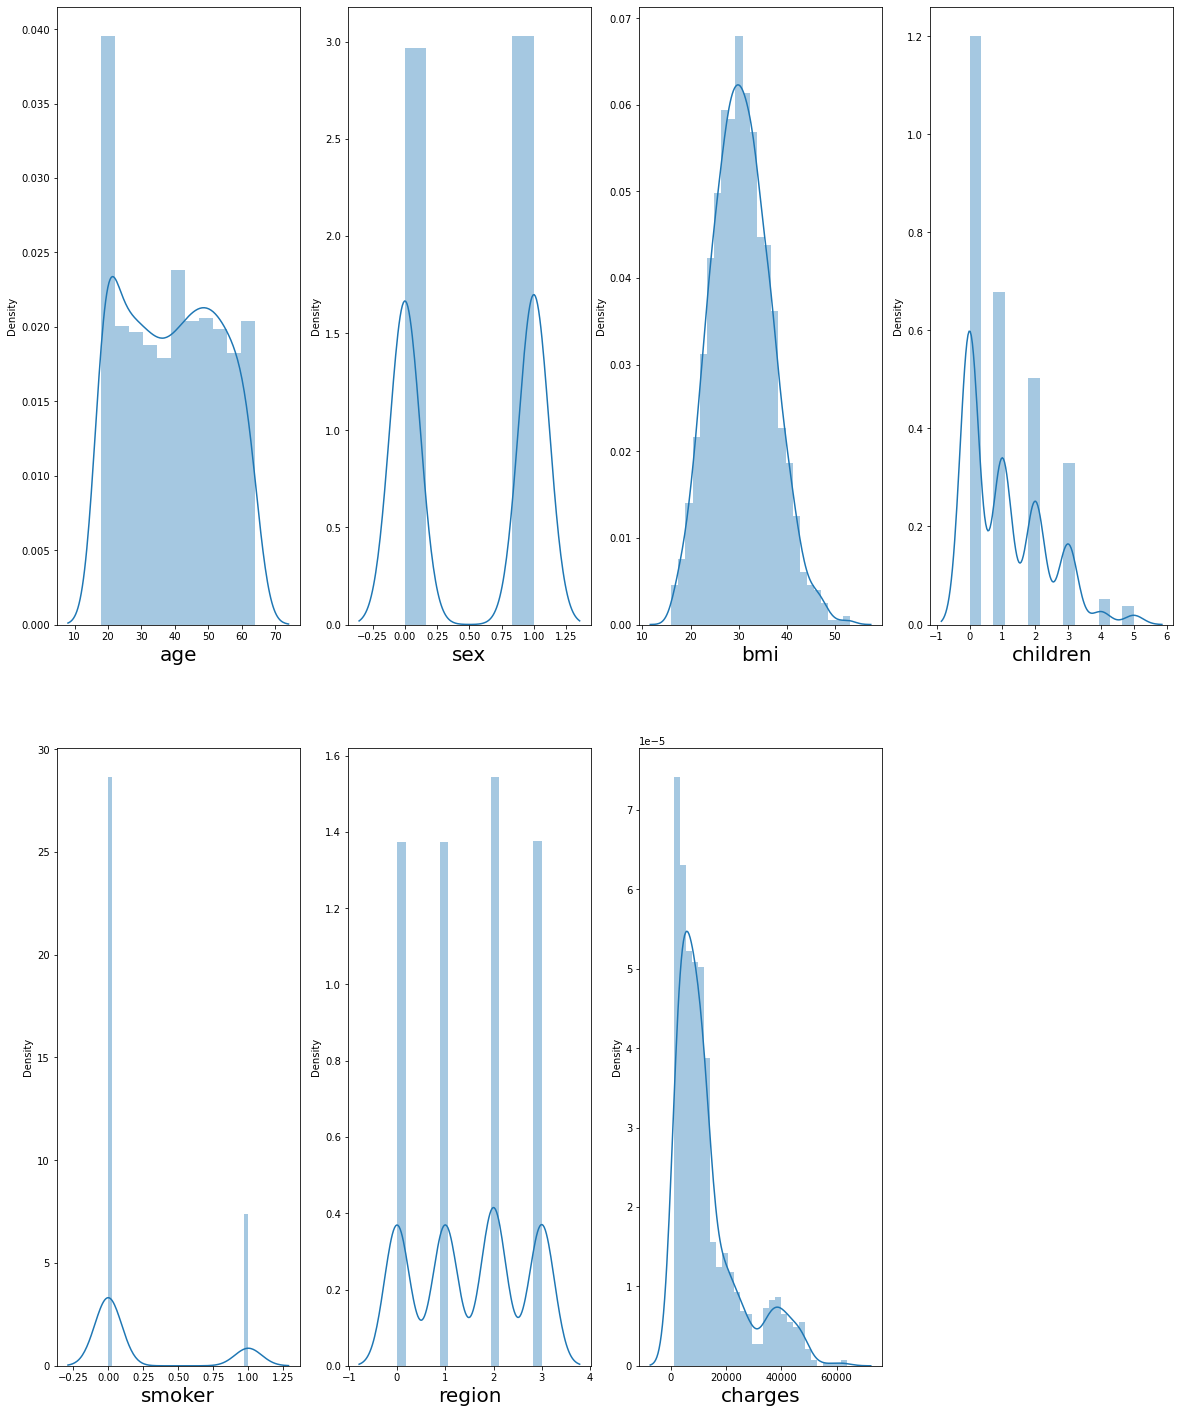

In [23]:
plt.figure(figsize=(20,25))
plotnumber=1

for column in df:
    if plotnumber<=7:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

FRom the above distribution plots we can see 'age','bmi' is normal distributed and 'charges' is skewed to right and rest all are fine distributed.

In [24]:
df['charges'].unique()

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [25]:
df['charges'].nunique()

1337

Therefore,we can say that there are 1337 values present in Target column,so we can sayy it is a regression problem.

1.0    675
0.0    662
Name: sex, dtype: int64


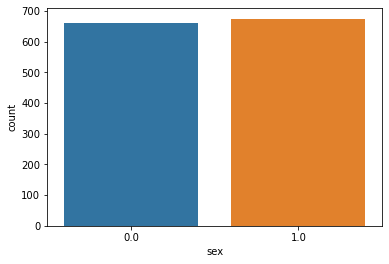

In [26]:
ax = sns.countplot(x='sex', data=df)
print(df['sex'].value_counts())

Here 1 represent 'male' and 0 represents 'female'. The count of male is high than female.

0.0    1063
1.0     274
Name: smoker, dtype: int64


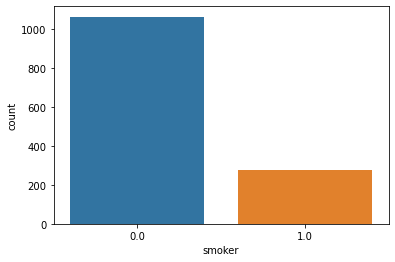

In [27]:
ax = sns.countplot(x='smoker', data=df)
print(df['smoker'].value_counts())

Here 1 represent 'smoker' and 0 represents 'non smoker'.The count of non smoker is high than smoker.

2    364
3    325
1    324
0    324
Name: region, dtype: int64


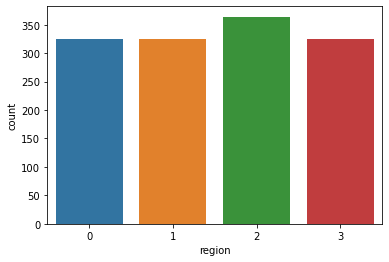

In [28]:
ax = sns.countplot(x='region', data=df)
print(df['region'].value_counts())

Here 0 represent 'northeast', 1 represent 'northwest', 2 represent 'southeast' ,3 represent 'southwest'.The count of southeast is higher than other regions.

0    573
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64


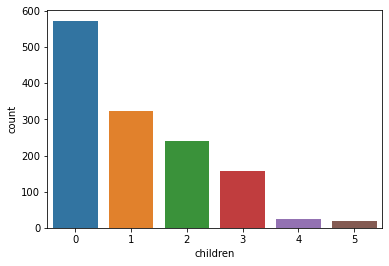

In [29]:
ax = sns.countplot(x='children', data=df)
print(df['children'].value_counts())

The count of not having children is more than count who have children

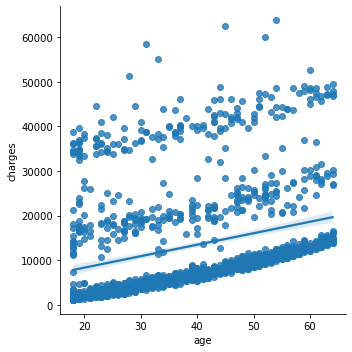

In [30]:
sns.lmplot(x='age',y='charges',data=df,palette='colorblind')

Most of The data are not gathered in best fit line,we can say age does not positive correlateed with charges

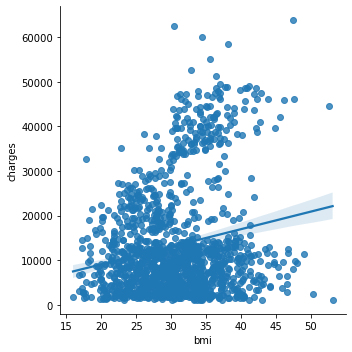

In [31]:
sns.lmplot(x='bmi',y='charges',data=df,palette='colorblind')

Most of The data are not gathered in best fit line,we can say bmi does not positive correlated with charges

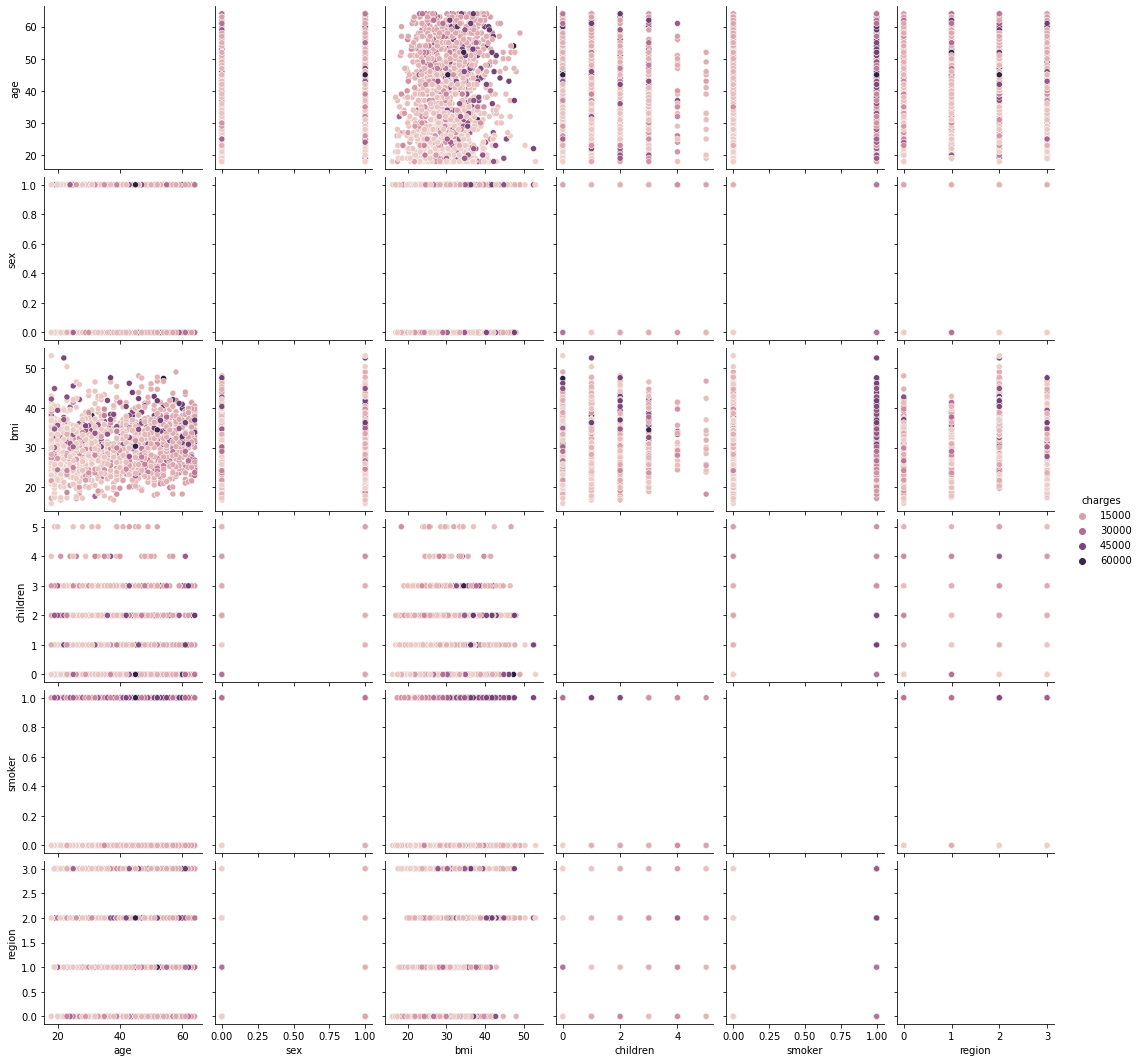

In [32]:
sns.pairplot(df,hue='charges')
plt.show()

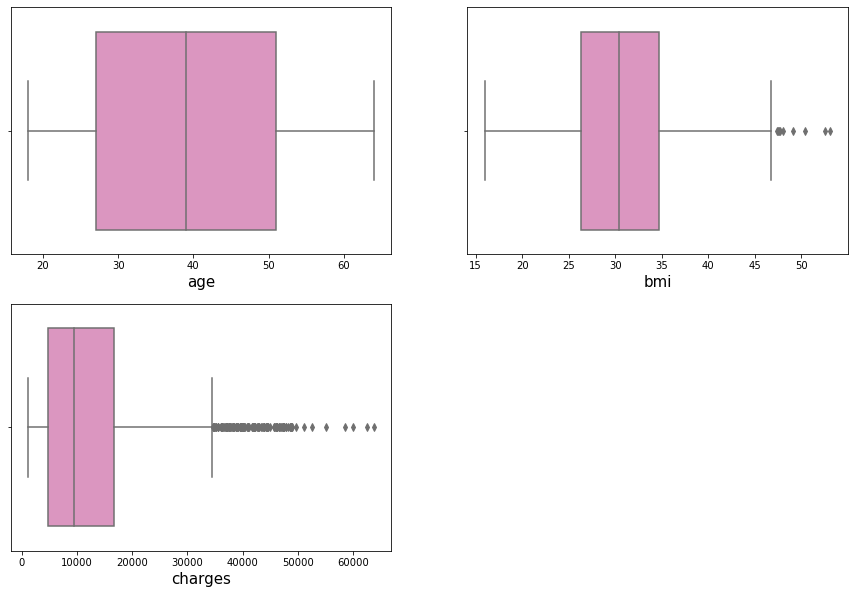

In [33]:
plt.figure(figsize=(15,10), facecolor = 'white')
plotnumber=1
for col in df[['age','bmi','charges']]:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[col], palette='Set2_r')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize=10)
    plotnumber+=1
plt.show()

From above plot,we can see 'age' has no outliers and 'bmi','charges' has outliers.We donot remove outliers from Target column.

In [34]:
from scipy.stats import zscore
outlr_features=df[['age','bmi']]
z=np.abs(zscore(outlr_features))
z

,age,bmi
0,1.440418,0.453160
1,1.511647,0.509422
2,0.799350,0.383155
3,0.443201,1.305052
4,0.514431,0.292456
...,...,...
1333,0.767704,0.050269
1334,1.511647,0.206053
1335,1.511647,1.014490
1336,1.297958,0.797524


In [35]:
np.where(z>3)

(array([ 116,  846, 1046, 1316], dtype=int64),
 array([1, 1, 1, 1], dtype=int64))

In [36]:
df1 = df[(z<3).all(axis=1)]
df1.shape

(1333, 7)

In [37]:
print('OLd Data Frame- ',df.shape[0])
print('New Data Frame- ',df1.shape[0])

OLd Data Frame-  1337
New Data Frame-  1333


In [38]:
print('Data Loss Percentage- ',((df.shape[0] - df1.shape[0])/df.shape[0])*100)

Data Loss Percentage-  0.2991772625280479


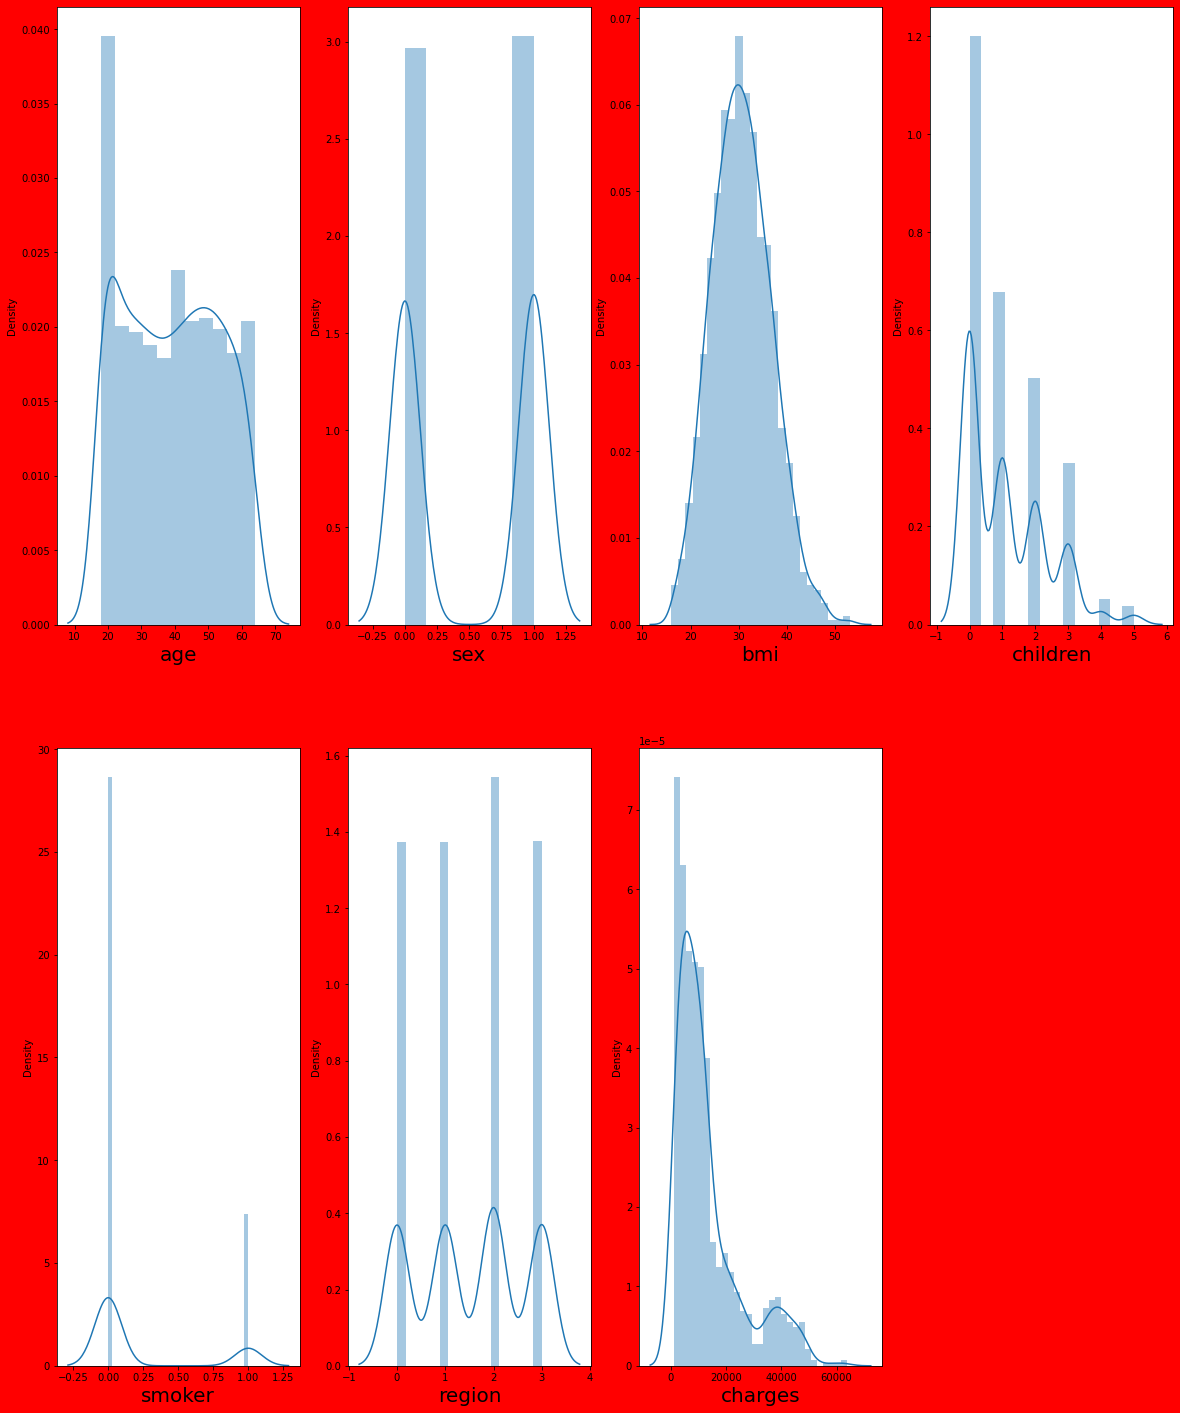

In [39]:
plt.figure(figsize=(20,25),facecolor='red')
plotnumber=1

for column in df:
    if plotnumber<=7:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=20)
    
    plotnumber+=1
plt.show()

From the above distribution plots we can see data looks normal in all columns except 'charges' column  which is skewed to right,we dont checkk skewness and outliers in Target column

# Checking skewness

In [40]:
df.skew()

age         0.054781
sex        -0.019469
bmi         0.283914
children    0.937421
smoker      1.463601
region     -0.039068
charges     1.515391
dtype: float64

We will not remove outliers and skewness from categorical columns/Target Columns.Hence 'children','smoker','charges' having skewness we will not remove it.

# Correlation with target variable and features

In [41]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.019814,0.109344,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.046397,0.017848,0.076596,0.004936,0.058044
bmi,0.109344,0.046397,1.000000,0.012755,0.003746,0.157574,0.198401
children,0.041536,0.017848,0.012755,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003746,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157574,0.016258,-0.002358,1.000000,-0.006547
charges,0.298308,0.058044,0.198401,0.067389,0.787234,-0.006547,1.000000


<AxesSubplot:>

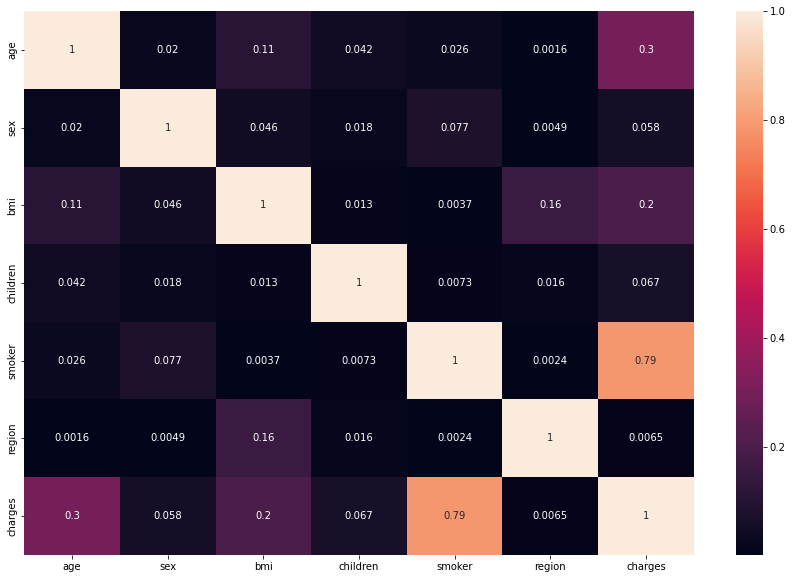

In [42]:
df_corr = df.corr().abs()
plt.figure(figsize=(15,10))
sns.heatmap(df_corr,annot=True,annot_kws={'size':10})

It seems 'smoker' and 'charges' are highly correlated as per above heatmap.

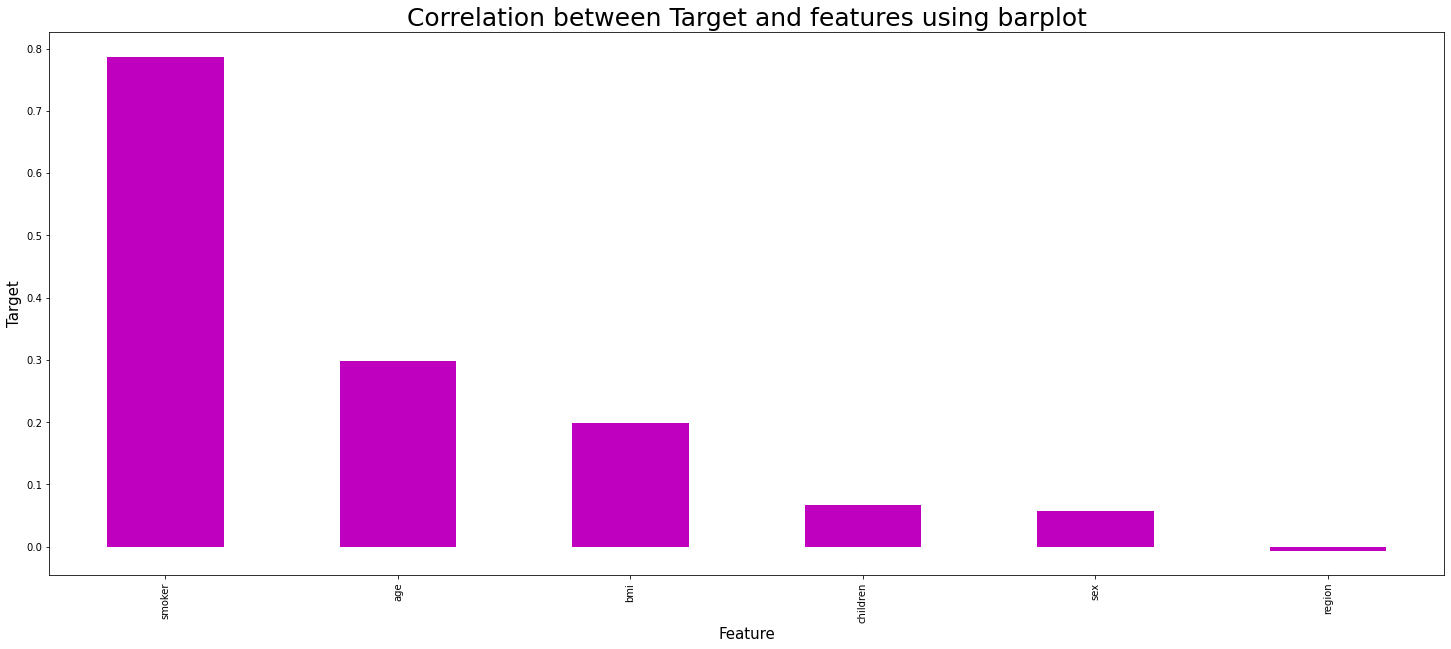

In [43]:
plt.figure(figsize=(25,10))
df.corr()['charges'].sort_values(ascending=False).drop(['charges']).plot(kind='bar',color='m')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('Target',fontsize=15)
plt.title("Correlation between Target and features using barplot",fontsize=25)
plt.show()

From the above plot we can say that 'region' has less contributing with Target column.

# Separating feature and label

In [44]:
x = df1.drop('charges',axis=1)
y = df1['charges']

print('Festures Dimension = ', x.shape)
print('Label Dimension = ', y.shape)

Festures Dimension =  (1333, 6)
Label Dimension =  (1333,)


In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scalar=StandardScaler()
x_scaled=scalar.fit_transform(x)

In [47]:
x_scaled.shape[1]

6

# Checking VIF

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [49]:
vif = pd.DataFrame()
vif['vif'] = [variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]

vif['Features'] = x.columns
vif

,vif,Features
0,1.017356,age
1,1.008073,sex
2,1.041622,bmi
3,1.002544,children
4,1.006479,smoker
5,1.025430,region


By checking VIF values we can find the features causing multicollinearity problem.VIF value greater than 10 which means they have high correlation with other features.All features are less than 10 means multicollinearity doesnot exists in all this features.All are independent.So,we dont have multicollinearity problem arises,which means all the features are important.

# Model Building

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [51]:

maxAccu=0
maxRs=0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Maximum r2_score is ", maxAccu,"On Random_state ",maxRS)

Maximum r2_score is  0.796307560668144 On Random_state  12


In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge

In [54]:
LR = LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)
pred_train=LR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_LR))
print('R2_score on training Data : ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :- ', mean_absolute_error(y_test,pred_LR))
print('Mean Squared Error :- ', mean_squared_error(y_test,pred_LR))
print('Root Mean Squared Error :- ', np.sqrt(mean_squared_error(y_test,pred_LR)))

R2_score: 0.796307560668144
R2_score on training Data :  72.8311519364745
Mean Absolute Error :-  3752.812437772448
Mean Squared Error :-  31441486.580109227
Root Mean Squared Error :-  5607.270867374718


In [55]:
RFR = RandomForestRegressor()
RFR.fit(x_train,y_train)
pred_RFR=RFR.predict(x_test)
pred_train=RFR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_RFR))
print('R2_score on training Data : ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :- ', mean_absolute_error(y_test,pred_RFR))
print('Mean Squared Error :- ', mean_squared_error(y_test,pred_RFR))
print('Root Mean Squared Error :- ', np.sqrt(mean_squared_error(y_test,pred_RFR)))

R2_score: 0.8743369145654344
R2_score on training Data :  97.17046127117435
Mean Absolute Error :-  2465.9114457523115
Mean Squared Error :-  19397058.758125935
Root Mean Squared Error :-  4404.209209168649


In [56]:
knn = KNN()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
pred_train=knn.predict(x_train)
print('R2_score:',r2_score(y_test,pred_knn))
print('R2_score on training Data : ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :- ', mean_absolute_error(y_test,pred_knn))
print('Mean Squared Error :- ', mean_squared_error(y_test,pred_knn))
print('Root Mean Squared Error :- ', np.sqrt(mean_squared_error(y_test,pred_knn)))

R2_score: 0.11525454315117711
R2_score on training Data :  40.14927403378129
Mean Absolute Error :-  8177.480890607501
Mean Squared Error :-  136567230.96631098
Root Mean Squared Error :-  11686.198311098053


In [57]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train,y_train)
pred_GBR=GBR.predict(x_test)
pred_train=GBR.predict(x_train)
print('R2_score:',r2_score(y_test,pred_GBR))
print('R2_score on training Data : ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :- ', mean_absolute_error(y_test,pred_GBR))
print('Mean Squared Error :- ', mean_squared_error(y_test,pred_GBR))
print('Root Mean Squared Error :- ', np.sqrt(mean_squared_error(y_test,pred_GBR)))

R2_score: 0.8985744872905786
R2_score on training Data :  88.85960533408054
Mean Absolute Error :-  2341.8234469345257
Mean Squared Error :-  15655803.952244377
Root Mean Squared Error :-  3956.7415826971032


In [58]:
lasso = Lasso()
lasso.fit(x_train,y_train)
pred_lasso=lasso.predict(x_test)
pred_train=lasso.predict(x_train)
print('R2_score:',r2_score(y_test,pred_lasso))
print('R2_score on training Data : ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :- ', mean_absolute_error(y_test,pred_lasso))
print('Mean Squared Error :- ', mean_squared_error(y_test,pred_lasso))
print('Root Mean Squared Error :- ', np.sqrt(mean_squared_error(y_test,pred_lasso)))

R2_score: 0.7962838021817622
R2_score on training Data :  72.83114306716587
Mean Absolute Error :-  3753.465143428022
Mean Squared Error :-  31445153.88427224
Root Mean Squared Error :-  5607.597871127373


In [59]:
rd = Ridge()
rd.fit(x_train,y_train)
pred_ridge=rd.predict(x_test)
pred_train=rd.predict(x_train)
print('R2_score:',r2_score(y_test,pred_ridge))
print('R2_score on training Data : ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :- ', mean_absolute_error(y_test,pred_ridge))
print('Mean Squared Error :- ', mean_squared_error(y_test,pred_ridge))
print('Root Mean Squared Error :- ', np.sqrt(mean_squared_error(y_test,pred_ridge)))

R2_score: 0.795642292391132
R2_score on training Data :  72.82856658206809
Mean Absolute Error :-  3767.7235201083413
Mean Squared Error :-  31544175.829020247
Root Mean Squared Error :-  5616.420196977809


In [60]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_DTR=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_DTR))
print('R2_score on training Data : ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :- ', mean_absolute_error(y_test,pred_DTR))
print('Mean Squared Error :- ', mean_squared_error(y_test,pred_DTR))
print('Root Mean Squared Error :- ', np.sqrt(mean_squared_error(y_test,pred_DTR)))

R2_score: 0.7516639255763287
R2_score on training Data :  99.80333070000582
Mean Absolute Error :-  2799.19896081
Mean Squared Error :-  38332573.25092942
Root Mean Squared Error :-  6191.330491173075


In [61]:
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor

In [62]:
svr = SVR()
svr.fit(x_train,y_train)
pred_SVR=svr.predict(x_test)
pred_train=svr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_SVR))
print('R2_score on training Data : ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :- ', mean_absolute_error(y_test,pred_SVR))
print('Mean Squared Error :- ', mean_squared_error(y_test,pred_SVR))
print('Root Mean Squared Error :- ', np.sqrt(mean_squared_error(y_test,pred_SVR)))

R2_score: -0.07131641618071893
R2_score on training Data :  -10.411767431664408
Mean Absolute Error :-  8187.986132152677
Mean Squared Error :-  165365886.10203207
Root Mean Squared Error :-  12859.466789180338


In [63]:
etr = ExtraTreesRegressor()
etr.fit(x_train,y_train)
pred_ETR=etr.predict(x_test)
pred_train=etr.predict(x_train)
print('R2_score:',r2_score(y_test,pred_ETR))
print('R2_score on training Data : ', r2_score(y_train,pred_train)*100)
print('Mean Absolute Error :- ', mean_absolute_error(y_test,pred_ETR))
print('Mean Squared Error :- ', mean_squared_error(y_test,pred_ETR))
print('Root Mean Squared Error :- ', np.sqrt(mean_squared_error(y_test,pred_ETR)))

R2_score: 0.8673963356236395
R2_score on training Data :  99.80333070000582
Mean Absolute Error :-  2374.998429617499
Mean Squared Error :-  20468390.224195257
Root Mean Squared Error :-  4524.200506630454


In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
score = cross_val_score(LR,x,y)
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is - ',(r2_score(y_test,pred_LR) - score.mean())*100)

[0.76244183 0.70819898 0.775179   0.73289379 0.75587313]
0.7469173454313716
Difference between R2 score and cross validation score is -  4.939021523677245


In [66]:
score1 = cross_val_score(RFR,x,y)
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is - ',(r2_score(y_test,pred_RFR) - score1.mean())*100)

[0.85209936 0.77240214 0.8700351  0.82866833 0.85328178]
0.8352973434337869
Difference between R2 score and cross validation score is -  3.9039571131647466


In [67]:
score2 = cross_val_score(knn,x,y)
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is - ',(r2_score(y_test,pred_knn) - score2.mean())*100)

[0.14419951 0.03522594 0.03913943 0.13345957 0.16658783]
0.10372245552327053
Difference between R2 score and cross validation score is -  1.1532087627906584


In [68]:
score3 = cross_val_score(GBR,x,y)
print(score3)
print(score3.mean())
print('Difference between R2 score and cross validation score is - ',(r2_score(y_test,pred_GBR) - score3.mean())*100)

[0.8737131  0.79825206 0.88825312 0.84763466 0.85973976]
0.8535185421128547
Difference between R2 score and cross validation score is -  4.505594517772393


In [69]:
score4 = cross_val_score(lasso,x,y)
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation score is - ',(r2_score(y_test,pred_lasso) - score4.mean())*100)

[0.7624638  0.70822621 0.77515877 0.73290243 0.75587232]
0.7469247053435115
Difference between R2 score and cross validation score is -  4.935909683825068


In [70]:
score5 = cross_val_score(rd,x,y)
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is - ',(r2_score(y_test,pred_ridge) - score5.mean())*100)

[0.76259016 0.70849892 0.77456362 0.73325876 0.75560804]
0.7469039018740024
Difference between R2 score and cross validation score is -  4.873839051712969


In [71]:
score6 = cross_val_score(dtr,x,y)
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is - ',(r2_score(y_test,pred_DTR) - score6.mean())*100)

[0.74919202 0.65791362 0.71444297 0.71161089 0.66958568]
0.7005490359908323
Difference between R2 score and cross validation score is -  5.1114889585496375


In [72]:
score7 = cross_val_score(svr,x,y)
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is - ',(r2_score(y_test,pred_SVR) - score7.mean())*100)

[-0.11378726 -0.11168542 -0.07674278 -0.10607396 -0.11080896]
-0.10381967612428089
Difference between R2 score and cross validation score is -  3.2503259943561957


In [73]:
score8 = cross_val_score(etr,x,y)
print(score8)
print(score8.mean())
print('Difference between R2 score and cross validation score is - ',(r2_score(y_test,pred_ETR) - score8.mean())*100)

[0.83483316 0.74544316 0.84894738 0.81592502 0.84746078]
0.8185219015823064
Difference between R2 score and cross validation score is -  4.8874434041333075


In [74]:

from sklearn.model_selection import GridSearchCV

RandomForestRegressor Hyperparameter tuning

In [75]:
parameters={
            'random_state': [10,50,100],
            'max_depth':[10,20,20],
            'n_jobs':[-2,-1,1],
            'n_estimators':[50,100,200,300]}

In [76]:
GCV=GridSearchCV(RandomForestRegressor(),parameters, cv=5)

In [77]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 20, 20],
                         'n_estimators': [50, 100, 200, 300],
                         'n_jobs': [-2, -1, 1], 'random_state': [10, 50, 100]})

In [78]:
GCV.best_params_

{'max_depth': 10, 'n_estimators': 300, 'n_jobs': -2, 'random_state': 100}

In [82]:
Model = RandomForestRegressor(max_depth=10,n_estimators=300,n_jobs=-2,random_state=100)

In [83]:
Model.fit(x_train,y_train)
pred=Model.predict(x_test)
print('R2_score: ',r2_score(y_test,pred))
print('Mean Absolute Error :- ',mean_absolute_error(y_test,pred))
print('Mean Squared Error :- ',mean_squared_error(y_test,pred))
print('Root Mean Squared Error :- ',np.sqrt(mean_squared_error(y_test,pred)))

R2_score:  0.8783770668597765
Mean Absolute Error :-  2485.619159621001
Mean Squared Error :-  18773430.337940942
Root Mean Squared Error :-  4332.831676622222


In [87]:
import joblib
import pickle

In [88]:
pickle.dump(Model,open('Medical_Insurance.pkl', 'wb'))

In [89]:
loaded_model=pickle.load(open('Medical_Insurance.pkl', 'rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

87.83770668597765


In [91]:

prediction = Model.predict(x_test)
prediction

array([ 6336.04949782,  8550.12075979, 12435.95789461,  4759.88748675,
        2144.65517753,  4976.10234965,  4781.92143453, 16284.88345704,
        4271.0933577 , 13770.55572408,  5834.62626889,  9987.94278637,
        5263.27551599,  7667.75148705, 34483.19203521, 11165.44239218,
       23819.88866223,  3911.14233093,  2463.25198542,  2296.42492177,
       18423.91154572,  6581.97689315, 10722.40791448, 19595.43533153,
       12010.55721583, 41301.10084249, 12205.19168387, 14893.47406354,
       38963.24103911, 14302.43804452, 39552.02568469,  4728.77391497,
       26129.81807041, 10935.95895073,  6018.75827498, 40693.04283488,
        8326.47580562, 39097.04310711,  7016.63979302, 48025.91553154,
       11986.35545773,  4321.19580767, 12542.57358197,  5339.43468056,
       12399.10247142,  7150.54798111, 14709.34325853, 27520.94747201,
       12022.23028565, 16291.39887458,  6511.64617558,  8934.20943653,
        9644.51057194, 12192.78379326,  8830.7342476 ,  4042.64551913,
      

These are the predicted 'charges' values of the customers.